In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import acquire
import prepare

#ignore minor warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = acquire.get_data(query_url = False)
print(df.shape)
df = prepare.prepare_dataframe(df)
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

Found file in working directory!
(70932, 83)


((40311, 60), (20155, 60), (20156, 60))

# Question 1 How much difference between foil vs non-foil card versions from the same set?

## Key takeaway
- Taking into account all sets the difference in favor of foil cards is $9.82

## Discusion
- The alternate hypothesis that there is a statistically significant difference between the prices of foil and non-foil cards is true.

## Visualization

In [3]:
def extract_price_data(df):
    """
    Extracts the price data from the price column
    Args:
        df (DataFrame) : a dataframe containing the scryfall data
    """
    # make columns for the data
    # each row contains a dictionary of data, use a lambda function 
    # applied to each item to extact the value
    df['usd'] = df.prices.apply(lambda r : r['usd'])
    df['usd'] = df['usd'].fillna(0)
    df['usd_foil'] = df.prices.apply(lambda r : r['usd_foil'])
    df['usd_foil'] = df['usd_foil'].fillna(0)
    df['eur'] = df.prices.apply(lambda r : r['eur'])
    df['eur'] = df['eur'].fillna(0)
    df['eur_foil'] = df.prices.apply(lambda r : r['eur_foil'])
    df['eur_foil'] = df['eur_foil'].fillna(0)
    # cast to a float value
    df['usd'] = df.usd.astype(float)
    df['usd_foil'] = df.usd_foil.astype(float)
    df['eur'] = df.usd.astype(float)
    df['eur_foil'] = df.usd_foil.astype(float)
    #return the dataframe
    return df

In [4]:
extract_price_data(train)

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,...,hand_modifier,content_warning,flavor_name,usd,is_foil,is_etched,is_glossy,usd_foil,eur,eur_foil
39296,8e1e4b26-0a2b-4078-adb3-1f66315afcf5,Goblin Razerunners,en,2017-10-24,normal,True,highres_scan,{2}{R}{R},4.0,Creature — Goblin Warrior,...,0.0,False,no_flavor,0.11,False,False,False,0.00,0.11,0.00
30783,6f2fc246-2e95-456f-aa4e-97768c4f4bb4,Rites of Initiation,en,2001-10-01,normal,True,highres_scan,{R},1.0,Instant,...,0.0,False,no_flavor,0.25,True,False,False,3.75,0.25,3.75
26765,606206c7-1a8a-46f4-b368-cf18e02f3df8,Undying Flames,en,2005-06-03,normal,True,highres_scan,{4}{R}{R},6.0,Sorcery,...,0.0,False,no_flavor,0.30,True,False,False,2.21,0.30,2.21
8690,1f391555-4697-4492-9854-32393f473104,Bombard,en,2018-11-16,normal,True,highres_scan,{2}{R},3.0,Instant,...,0.0,False,no_flavor,0.05,False,False,False,0.00,0.05,0.00
25570,5c1f3f52-cb9b-4b2a-bb02-6175897ae76e,Our Market Research Shows That Players Like Re...,en,2004-11-19,normal,True,highres_scan,{1}{G}{G},3.0,Creature — Elemental,...,0.0,False,no_flavor,0.20,True,False,False,13.92,0.20,13.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60911,db490f74-977f-476d-b8ee-da7b0a98b4c4,Sharktocrab,en,2020-11-20,normal,True,highres_scan,{2}{G}{U},4.0,Creature — Shark Octopus Crab,...,0.0,False,no_flavor,0.06,False,False,False,0.00,0.06,0.00
58616,d2e9decf-47b7-44e0-b380-8055b6011021,Pyramids,en,1993-12-17,normal,True,highres_scan,{6},6.0,Artifact,...,0.0,False,no_flavor,175.77,False,False,False,0.00,175.77,0.00
1656,05e9fec4-1e0a-4206-ab2b-cc2543cba667,Mana Vault,en,1997-03-24,normal,True,highres_scan,{1},1.0,Artifact,...,0.0,False,no_flavor,61.97,False,False,False,0.00,61.97,0.00
4195,0edc37c6-b6a8-424f-95dd-928d03c28542,Kamahl's Summons,en,2002-10-07,normal,True,highres_scan,{3}{G},4.0,Sorcery,...,0.0,False,no_flavor,0.29,True,False,False,3.02,0.29,3.02


In [5]:
train['usd'] = pd.to_numeric(train['usd'])
train['usd_foil'] = pd.to_numeric(train['usd_foil'])
avg_nonfoil = train.groupby("foil")['usd'].mean().dropna()
avg_foil = train.groupby("nonfoil")['usd_foil'].mean().dropna()
foil_diff = avg_foil - avg_nonfoil
foil_vs_nonfoil = pd.concat([avg_foil, avg_nonfoil, foil_diff], axis=1)
foil_vs_nonfoil = foil_vs_nonfoil[~(foil_vs_nonfoil == 0).all(axis=1)]
foil_vs_nonfoil.columns = ['foils', 'nonfoils', 'price_difference']

In [16]:
train.groupby("foil")['usd'].mean().dropna()

foil
False    12.755895
True      1.849298
Name: usd, dtype: float64

In [18]:
foil_vs_nonfoil

,foils,nonfoils,price_difference
True,4.73478,1.849298,2.885482
False,NaN,12.755895,NaN


<Figure size 1152x648 with 0 Axes>

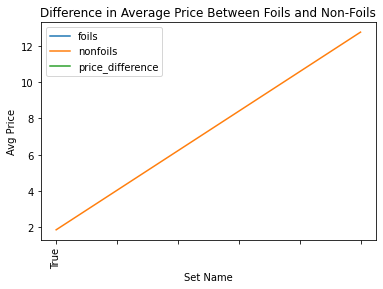

In [6]:
def foil_vs_nonfoil_viz(df):
    plt.figure(figsize = (16,9))
    df.plot(rot=90)
    plt.title('Difference in Average Price Between Foils and Non-Foils')
    plt.xlabel('Set Name')
    plt.ylabel('Avg Price')
    plt.show()

foil_vs_nonfoil_viz(foil_vs_nonfoil)
# try as barchart with foil/non-foil

## Hypothesis Testing
Significance Level: α = 0.05
- $H_0$ = There is not a signficant difference between foil & non-foil cards
- $H_A$ = There is a significant difference between foil & non-foil cards

In [7]:
α = 0.05
# Checks variance
print(avg_foil.var())
print(avg_nonfoil.var())

nan
59.47693532721543


In [8]:
t, p = stats.ttest_ind(avg_foil, avg_nonfoil, equal_var=False)
t, p / 2

(nan, nan)

In [9]:
p / 2 < α

False

# Question 2: What effect does frame/full art/ highres_image have on price?

## Key takeaway
- key takeaway 1

## Discusion
At least 3 sentences explanation

## Visualization

In [10]:
#functions go here

## Hypothesis Testing

In [11]:
#functions go here

# Question 3: What’s the difference in card prices of prior printings vs its latest reprint?

## Key takeaway
- key takeaway 1

## Discusion
At least 3 sentences explanation

## Visualization

In [12]:
#functions go here

## Hypothesis Testing

In [13]:
#functions go here